<a href="https://colab.research.google.com/github/KacperKurzydlo/UdzialBadaniaNaukowe/blob/main/Udzia%C5%82BadaniaNaukowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import laplace
from scipy.integrate import solve_bvp

In [ ]:
nx, ny = 102, 102
u = np.zeros((ny, nx))


boundaries = {
    "left": np.random.choice(["D", "N"]),
    "right": np.random.choice(["D", "N"]),
    "bottom": np.random.choice(["D", "N"]),
    "top": np.random.choice(["D", "N"])
}

print("Lewo: " + boundaries["left"] + "\n" +
      "Prawo: " + boundaries["right"] + "\n" +
      "Dół: " + boundaries["bottom"] + "\n" +
      "Góra: " + boundaries["top"])

# Warunki brzegowe D
if boundaries["left"] == "D":
    u[:, 0] = np.random.uniform(0, 100)
if boundaries["right"] == "D":
    u[:, -1] = np.random.uniform(0, 100)
if boundaries["bottom"] == "D":
    u[0, :] = np.random.uniform(0, 100)
if boundaries["top"] == "D":
    u[-1, :] = np.random.uniform(0, 100)

tolerance = 1e-6
error = 1


while error > tolerance:
    u_new = u.copy()


    u_new[1:-1, 1:-1] = 0.25 * (u[1:-1, :-2] + u[1:-1, 2:] + u[:-2, 1:-1] + u[2:, 1:-1])

    # Warunki brzegowe N
    if boundaries["left"] == "N":
        u_new[:, 0] = u_new[:, 1]
    if boundaries["right"] == "N":
        u_new[:, -1] = u_new[:, -2]
    if boundaries["bottom"] == "N":
        u_new[0, :] = u_new[1, :]
    if boundaries["top"] == "N":
        u_new[-1, :] = u_new[-2, :]


    error = np.max(np.abs(u - u_new))
    u = u_new

Lewo: D
Prawo: D
Dół: N
Góra: N


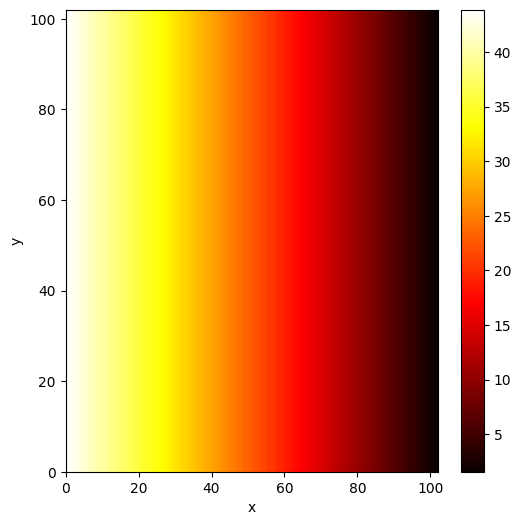

In [ ]:
plt.figure(figsize=(6, 6))
plt.pcolormesh(u, cmap='hot')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
nx, ny = 102, 102
tolerance = 1e-6

size_x = 2
size_y = 2

u_tab = np.zeros([size_x, size_y, nx, ny])

for i in range(size_x):
    for j in range(size_y):

        u = np.zeros((ny, nx))

        boundaries = {
            "left": np.random.choice(["D", "N"]),
            "right": np.random.choice(["D", "N"]),
            "bottom": np.random.choice(["D", "N"]),
            "top": np.random.choice(["D", "N"])
        }


        if boundaries["left"] == "D":
            u[:, 0] = np.random.uniform(0, 1)
        if boundaries["right"] == "D":
            u[:, -1] = np.random.uniform(0, 1)
        if boundaries["bottom"] == "D":
            u[0, :] = np.random.uniform(0, 1)
        if boundaries["top"] == "D":
            u[-1, :] = np.random.uniform(0, 1)

        error = 1

        while error > tolerance:
            u_new = u.copy()

            u_new[1:-1, 1:-1] = 0.25 * (u[1:-1, :-2] + u[1:-1, 2:] + u[:-2, 1:-1] + u[2:, 1:-1])


            if boundaries["left"] == "N":
                u_new[:, 0] = u_new[:, 1]
            if boundaries["right"] == "N":
                u_new[:, -1] = u_new[:, -2]
            if boundaries["bottom"] == "N":
                u_new[0, :] = u_new[1, :]
            if boundaries["top"] == "N":
                u_new[-1, :] = u_new[-2, :]


            error = np.max(np.abs(u - u_new))
            u = u_new

        u_tab[i, j] = u

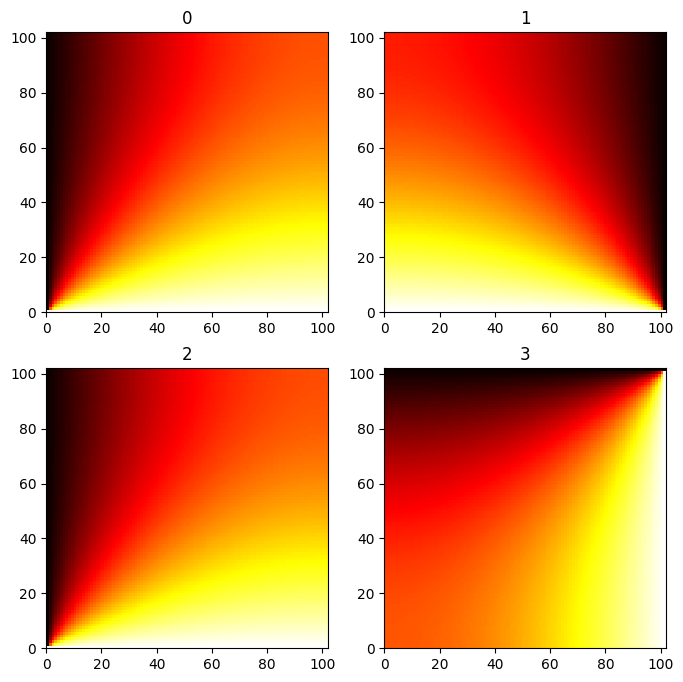

In [ ]:
fig, axes = plt.subplots(size_x, size_y, figsize=(8, 8))

for i in range(size_x):
    for j in range(size_y):
        ax = axes[i, j]
        c = ax.pcolormesh(u_tab[i, j], cmap='hot')
        ax.set_title(f"{i*size_x + j}")

plt.savefig("HeatMap.pdf")
plt.show()

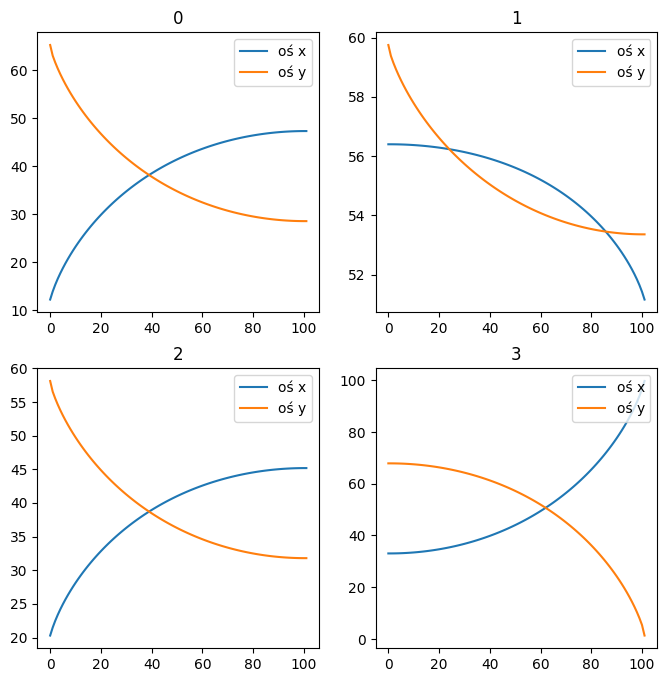

In [ ]:
fig, axes = plt.subplots(size_x, size_y, figsize=(8, 8))

for i in range(size_x):
    for j in range(size_y):
        ax = axes[i, j]
        c = ax.plot(np.sum(u_tab[i, j], axis=0), label="oś x")
        c = ax.plot(np.sum(u_tab[i, j], axis=1), label="oś y")
        ax.set_title(f"{i*size_x + j}")
        ax.legend(loc='upper right')

plt.savefig("RzutNaOsie.pdf")
plt.show()

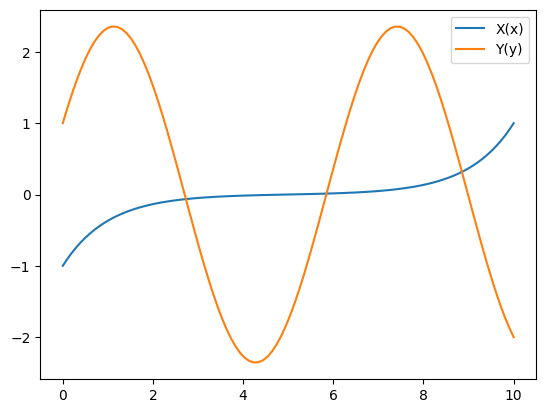

In [26]:
def f_x(x, vars):
    X, W = vars
    dX_dx = W
    dW_dw = C * X
    return [dX_dx, dW_dw]

def f_y(y, vars):
    Y, Z = vars
    dY_dy = Z
    dZ_dy = -C * Y
    return [dY_dy, dZ_dy]

def wb_x(vars_a, vars_b):
    X_a, W_a = vars_a
    X_b, W_b = vars_b
    return np.array([X_a + X_p, X_b + X_k])

def wb_y(vars_a, vars_b):
    Y_a, Z_a = vars_a
    Y_b, Z_b = vars_b
    return np.array([Y_a + Y_p, Y_b + Y_k])

C = 1

# Warunki początkowe
X_p = 1.0  # np. X_a_p = 1 co daje X_a + 1.0 = 0 co oznacza X_a = -1.0
X_k = -1.0

Y_p = -1.0
Y_k = 2.0

# Zakres obliczeniowy
x_start = 0
x_end = 10
x = np.linspace(x_start, x_end, 100)
X_guess = np.zeros((2, x.size))

y_start = 0
y_end = 10
y = np.linspace(y_start, y_end, 100)
Y_guess = np.zeros((2, y.size))

solution_x = solve_bvp(f_x, wb_x, x, X_guess)
solution_y = solve_bvp(f_y, wb_y, y, Y_guess)

plt.plot(solution_x.x, solution_x.y[0], label="X(x)")
plt.plot(solution_y.x, solution_y.y[0], label="Y(y)")
plt.legend()
plt.show()

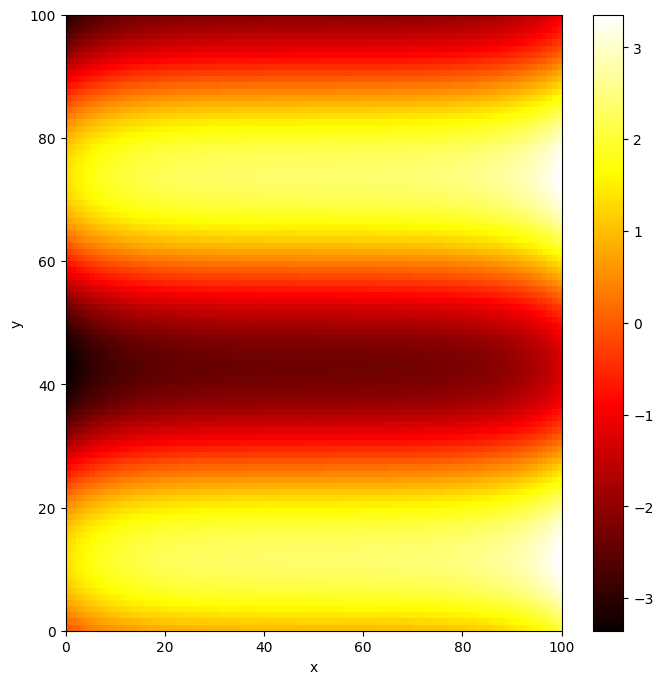

In [27]:
X_values, Y_values = np.meshgrid(solution_x.y[0], solution_y.y[0])
Z_values = X_values + Y_values


plt.figure(figsize=(8, 8))
plt.pcolormesh(Z_values, cmap='hot')
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.show()